#### The scenario

The housing market is one of the most crucial parts of every country's economy.Purchasing a home is one of the primary ways to build wealth and savings for people. In this respect, predicting prices in the housing market is a central topic in economic and financial circles.
The primary objective of house price prediction is to accurately estimate the selling or buying price of a residential property based on its characteristics.

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse,rmse
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV,ElasticNetCV

import warnings
warnings.filterwarnings('ignore')

In [174]:
# Downloading the House Price Dataset

houseprices_df = pd.read_csv('C:/Users/chowd/OneDrive/Desktop/Datasets/DA_-_houseprices.csv')

In [175]:
# Exploring the Dataset
houseprices_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [176]:
houseprices_df.shape
print(f"The dataset has {houseprices_df.shape[0]} rows and {houseprices_df.shape[1]} columns.")

The dataset has 1460 rows and 81 columns.


In [177]:
houseprices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

In [178]:
# Statistical features of the numeric columns
houseprices_df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [179]:
# Some columns are numerical and some are non-numerical
non_numeric_columns = houseprices_df.select_dtypes(['object']).columns
print(non_numeric_columns)
print('The number of non-numeric columns is {}'.format(len(non_numeric_columns)))

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')
The number of non-numeric columns is 43


In [180]:
numeric_columns = houseprices_df.select_dtypes(['int64','float']).columns
print(numeric_columns)
print('The number of numeric columns is {}'.format(len(numeric_columns)))

Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch',
       'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')
The number of numeric columns is 38


In [181]:
# Missing Data
total_missing = houseprices_df.isnull().sum().sort_values(ascending=False)
percent_missing = (houseprices_df.isnull().sum()/houseprices_df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total_missing,percent_missing],axis=1,keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
poolqc,1453,0.995205
miscfeature,1406,0.963014
alley,1369,0.937671
fence,1179,0.807534
fireplacequ,690,0.472603
lotfrontage,259,0.177397
garageyrblt,81,0.055479
garagecond,81,0.055479
garagetype,81,0.055479
garagefinish,81,0.055479


#### We see 19 features has missing values. Since we are not using any of these features in our analysis nothing is done with these features.

#### Exploratory Data Analysis & Feature Selection

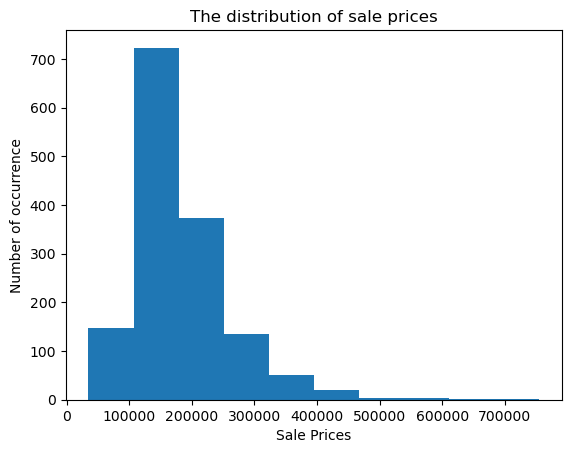

In [182]:
plt.hist(houseprices_df.saleprice)
plt.title('The distribution of sale prices')
plt.xlabel('Sale Prices')
plt.ylabel('Number of occurrence')
plt.show()

#### We see that the distribution of Sale Prices is positively skewed.

In [183]:
# We derive correlations of the features with our target variable irrespective of their signs by taking absolute values
correlation_df = np.abs(houseprices_df[numeric_columns].iloc[:,1:].corr().loc[:,'saleprice']).sort_values(ascending=False)
print(correlation_df)

saleprice        1.000000
overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
firstflrsf       0.605852
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
yearremodadd     0.507101
garageyrblt      0.486362
masvnrarea       0.477493
fireplaces       0.466929
bsmtfinsf1       0.386420
lotfrontage      0.351799
wooddecksf       0.324413
secondflrsf      0.319334
openporchsf      0.315856
halfbath         0.284108
lotarea          0.263843
bsmtfullbath     0.227122
bsmtunfsf        0.214479
bedroomabvgr     0.168213
kitchenabvgr     0.135907
enclosedporch    0.128578
screenporch      0.111447
poolarea         0.092404
mssubclass       0.084284
overallcond      0.077856
mosold           0.046432
threessnporch    0.044584
yrsold           0.028923
lowqualfinsf     0.025606
miscval          0.021190
bsmthalfbath     0.016844
bsmtfinsf2       0.011378
Name: saleprice, dtype: float64


#### We observe that some of the features (top 5) having high correlation with saleprice and therefore having strong informative & predictive power are 'overallqual', 'grlivarea ', 'garagecars', 'garagearea' & 'totalbsmtsf'.

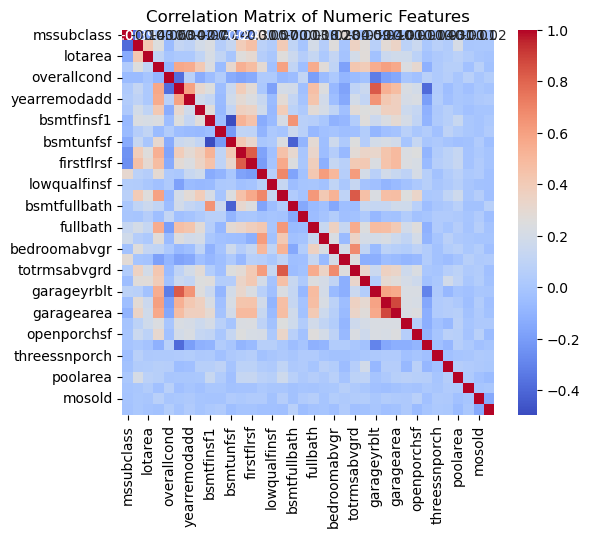

In [184]:
import seaborn as sns

numeric_columns_without_target = [col for col in numeric_columns if col != 'saleprice']

if 'id' in numeric_columns_without_target:
    numeric_columns_without_target.remove('id')

# Calculating the correlation matrix
correlation_matrix = houseprices_df[numeric_columns_without_target].corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

#### Exploratory Data Analysis for the target variable and the categorical features & non-numeric features

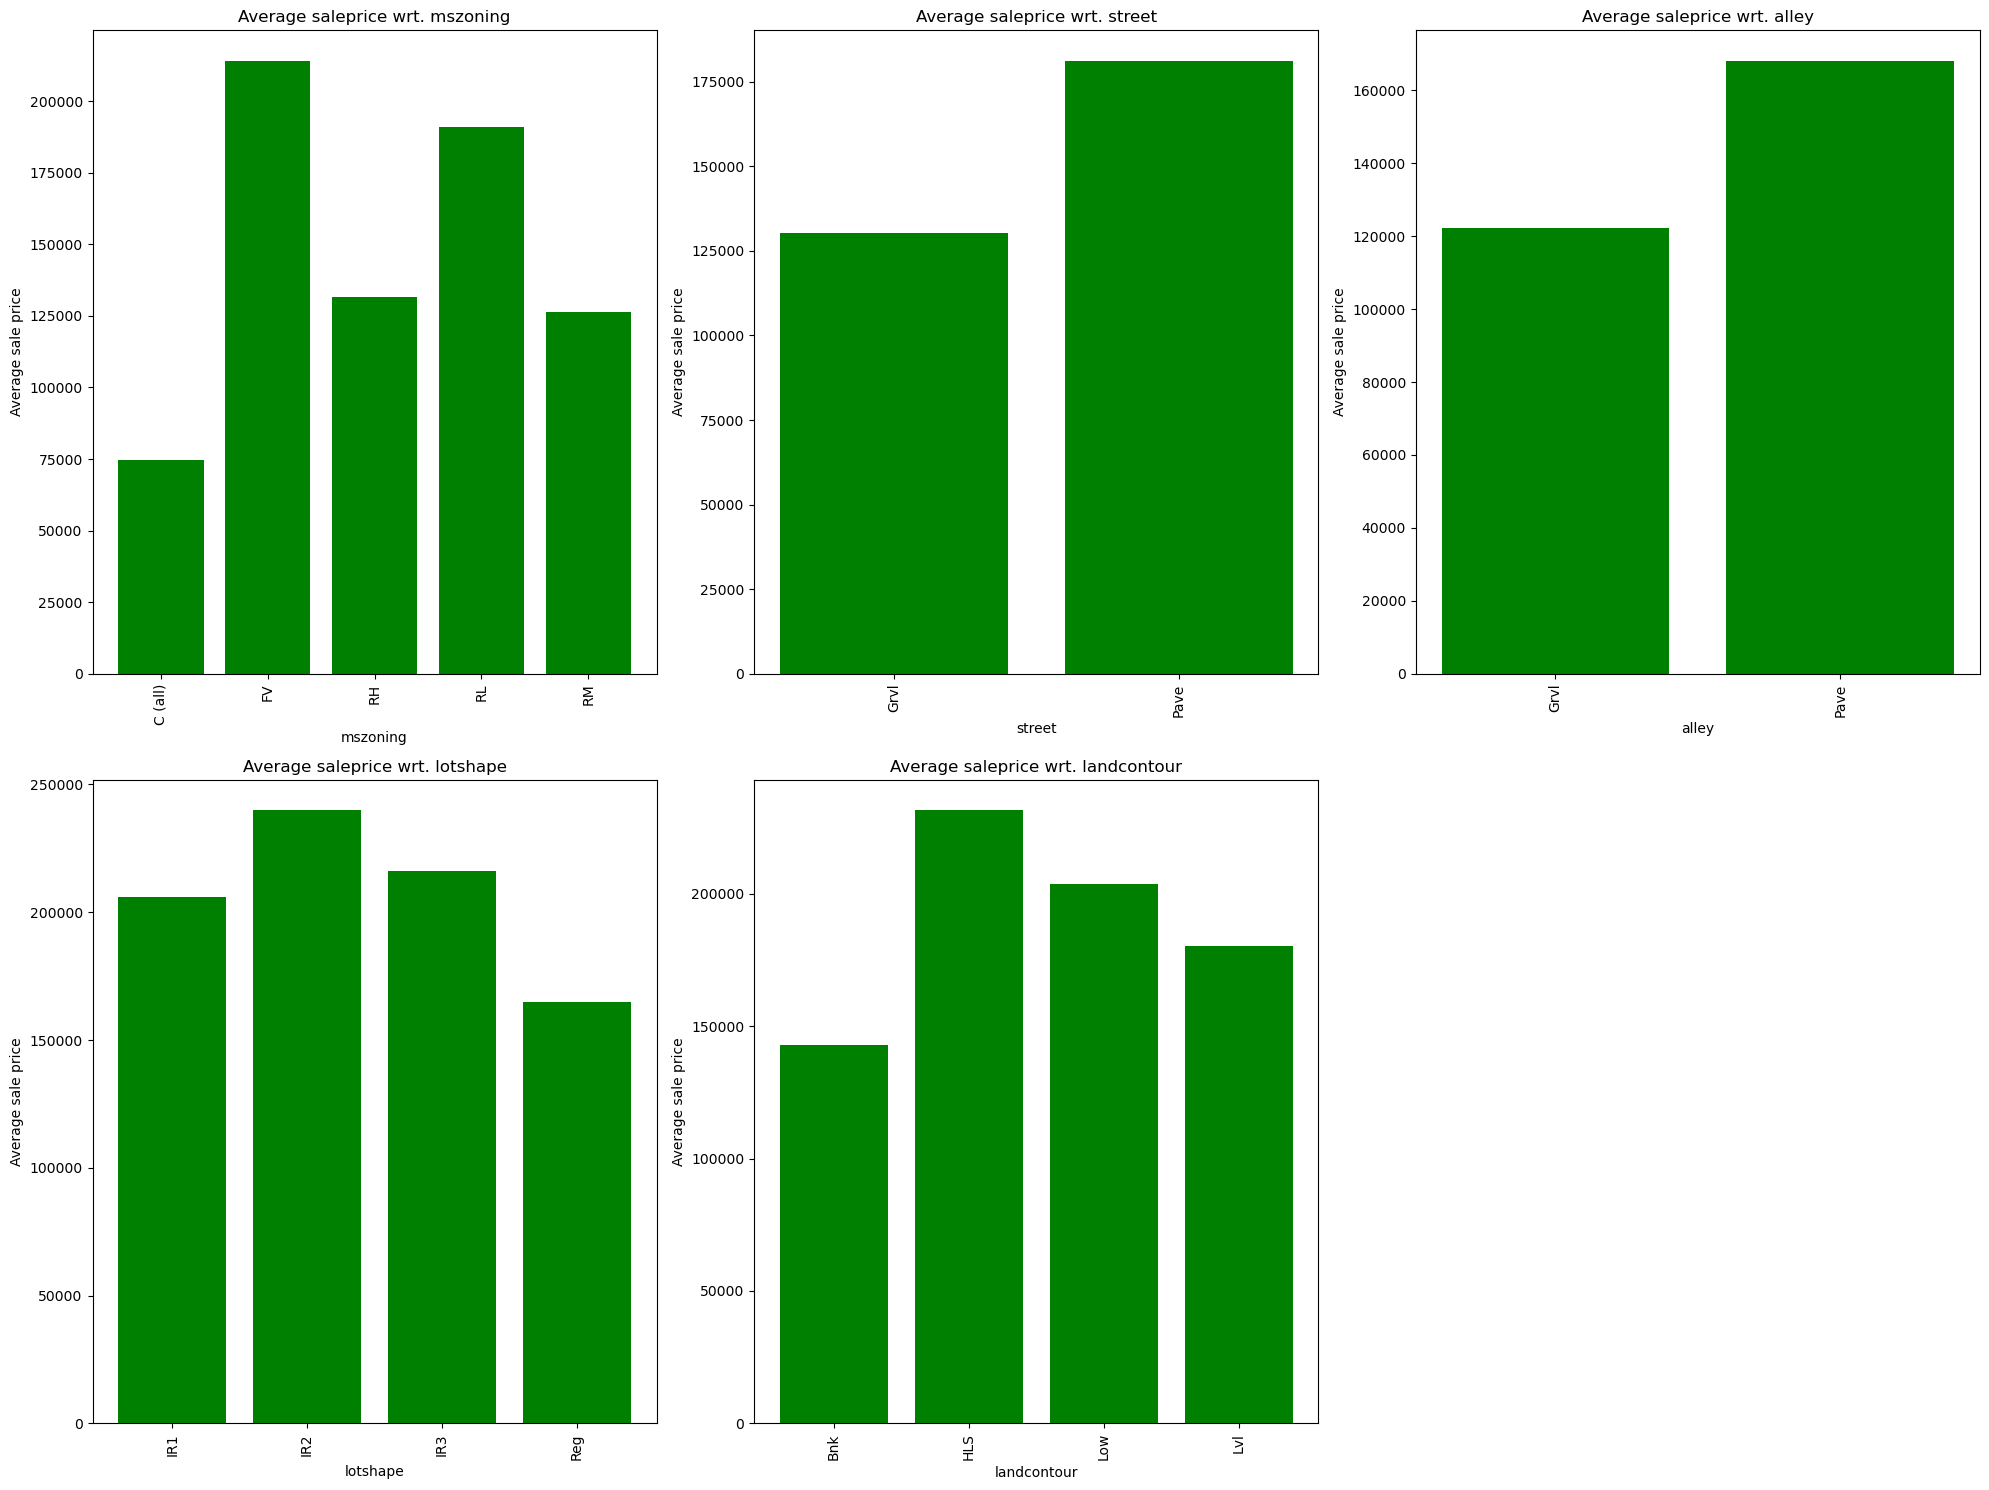

In [185]:
# Selecting the top 5 non-numeric features
top_non_numeric_features = non_numeric_columns[:5]  

plt.figure(figsize=(20, 15)) 

for index, column in enumerate(top_non_numeric_features):
    plt.subplot(2, 3, index + 1)  
    plt.bar(houseprices_df.groupby(column)['saleprice'].mean().index,
            houseprices_df.groupby(column)["saleprice"].mean(),
            color='green')  # Using a single color for all bars
    plt.title("Average saleprice wrt. {}".format(column))
    plt.ylabel("Average sale price")
    plt.xlabel(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()


In [186]:
# For creating our model, we choose the top 5 numerical variables that are most correlated with the saleprice. We also add 2 non-numerical features.
houseprices_df = pd.concat([houseprices_df,pd.get_dummies(houseprices_df.mszoning,prefix = 'mszoning',drop_first = True)],axis =1)
houseprices_df = pd.concat([houseprices_df,pd.get_dummies(houseprices_df.street,prefix ='street',drop_first = True)],axis =1)
dummy_column_names = list(pd.get_dummies(houseprices_df.mszoning,prefix = 'mszoning',drop_first = True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(houseprices_df.street, prefix = 'street',drop_first = True).columns)

In [187]:
# Regression Model
# Creating 2 new features: The new feature 'totalsf' calculates the total square footage by summing the basement, first floor, and second floor areas.
# The feature 'int_over_sf' represents the interaction between 'totalsf' and 'overallqual'
houseprices_df['totalsf']= houseprices_df['totalbsmtsf']+ houseprices_df['firstflrsf']+houseprices_df['secondflrsf']
houseprices_df['int_over_sf'] = houseprices_df['totalsf']*houseprices_df['overallqual']
# Y is the target variable (The transformation using log is done to handle the skewed dataset)
Y = np.log1p(houseprices_df['saleprice'])
X = houseprices_df[['overallqual','grlivarea','garagecars','garagearea','totalsf','int_over_sf'] + dummy_column_names]
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 465)
# This defines a list of alpha values to be used in regularization
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

In [188]:
# Standardizing or normalizing the features:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

#### Linear Regression

In [189]:
lrm = LinearRegression()
lrm.fit(X_train,y_train)
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)
print("R-squared of the model in training set is: {}".format(lrm.score(X_train,y_train)))
print("-----Test set statistics----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test,y_test)))
print("Mean absolute error of the prediction is : {}".format(mean_absolute_error(y_test,y_preds_test)))
print("Mean squared error of the prediction is : {}".format(mse(y_test,y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test,y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test-y_preds_test)/y_test))*100))

R-squared of the model in training set is: 0.832132255313275
-----Test set statistics----
R-squared of the model in test set is: 0.8249302330916417
Mean absolute error of the prediction is : 0.12570372872861593
Mean squared error of the prediction is : 0.029192121871357217
Root mean squared error of the prediction is: 0.17085702172096182
Mean absolute percentage error of the prediction is: 1.0503577667823654


#### Checking for the OLS assumptions:

In [190]:
# Checking for mean of the error terms
errors = y_test - y_preds_test
print('Mean of the errors is: {}'.format(np.mean(errors)))

Mean of the errors is: 0.0064441217328726355


##### Hence we conclude that the mean of the errors is approx. zero.

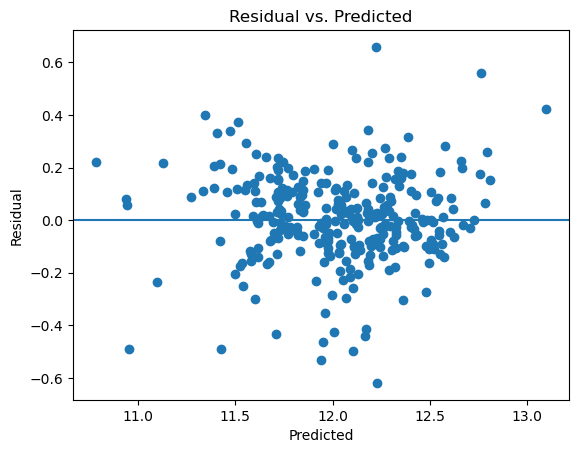

In [191]:
# Checking for the heteroscedasticity of the error terms
plt.scatter(y_preds_test,errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [192]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(y_preds_test,errors)
lev_stats = levene(y_preds_test,errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 159.113 and p value is 1.77e-36
Levene test statistic value is 133.782 and p value is 5.39e-28


#### From the scatter plot and the barlett test & Levene test we conclude that heteroscedasticity is present,i.e non-constant variance of error terms.
Heteroscedasticity does have negative consequences, but they have generally lower impact than those of failing to meet any other OLS assumptions. Crucially, OLS will still remain a consistent estimator and produce unbiased parameter estimates in the presence of heteroscedasticity. The primary downside is that hypothesis tests on the parameters may produce biased parameter estimation. They may inaccurately estimate the standard deviation of the sampling distribution of a parameter, which may lead to an erroneous conclusion that a feature is not statistically significant. 

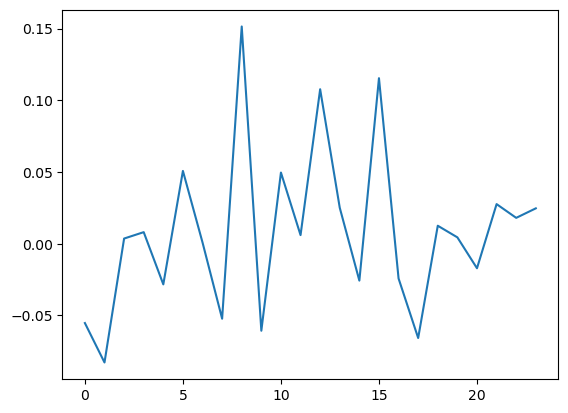

In [193]:
#Checking for uncorrelated error terms or Autocorrelation
from statsmodels.tsa.stattools import acf
acf_data = acf(errors)
plt.plot(acf_data[1:])
plt.show()

#### We can say that the error terms are uncorrelated,i.e there is no autocorrelation

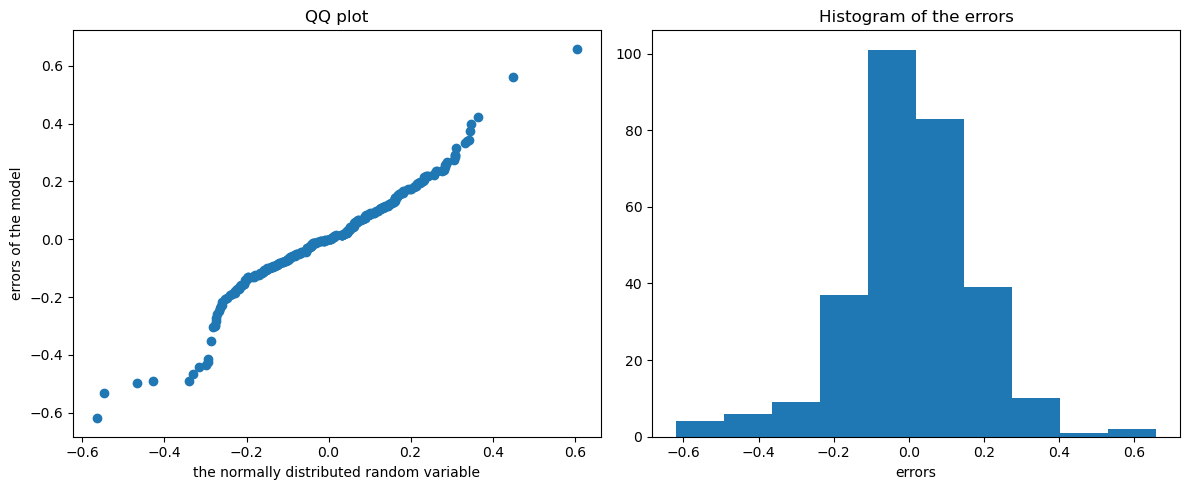

In [194]:
# Checking for normality of errors
rand_nums = np.random.normal(np.mean(errors),np.std(errors),len(errors))

plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums),np.sort(errors))
plt.xlabel('the normally distributed random variable')
plt.ylabel('errors of the model')
plt.title('QQ plot')

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel('errors')
plt.title('Histogram of the errors')

plt.tight_layout()
plt.show()

In [195]:
# Visually from the histogram & QQ Plot it appears that the errors might be normally distributed.
# Using tests to verify the normality of errors
from scipy.stats import jarque_bera
from scipy.stats import normaltest
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print('Jarque-Bera test statistic is {0} and p value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistics is {0} and p-value is {1}'.format(norm_stats[0],norm_stats[1]))

Jarque-Bera test statistic is 46.68188351253456 and p value is 7.297225932363262e-11
Normality test statistics is 19.994674991873726 and p-value is 4.552096832126807e-05


#### The p-values of both tests indicate that the errors are not normally distributed.
Although this isn't an assumption of the Gauss-Markov theorem, it still can impact the results. Specifically, normality of errors is not required to apply OLS to a linear regression model. But to measure the statistical significance of estimated coefficients, error terms must be normally distributed. 

In [196]:
# Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 

# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                  for i in range(len(X.columns))] 

print(vif_data)

        feature         VIF
0   overallqual  118.402064
1     grlivarea   40.988935
2    garagecars   33.038210
3    garagearea   28.935814
4       totalsf  175.786057
5   int_over_sf  104.308904
6   mszoning_FV    7.616859
7   mszoning_RH    2.536209
8   mszoning_RL  112.700966
9   mszoning_RM   21.573015
10  street_Pave  155.326978


#### Features with high VIF are 'overallqual','totalsf','int_over_sf' ( which are the newly created features) & 'mszoning_RL' indicating the presence of multicollinearity.
Linear regression or Ordinary Least Squares (OLS) can still be applied even if the multicollinearity assumption is not satisfied. High multicollinearity can lead to unstable coefficient estimates, high standard errors, and reduced interpretability of the model.

#### Lasso Regression

In [197]:
lasso_cv = LassoCV(alphas= alphas, cv =5)
lasso_cv.fit(X_train,y_train)
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)
print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model is : {}".format(lasso_cv.score(X_train,y_train)))
print("----Test set statistics----")
print("R-squared of the model in test set is : {}".format(lasso_cv.score(X_test,y_test)))
print(" Mean absolute error of the prediction is: {}".format(mse(y_test,y_preds_test)))
print("Root mean  squared error of the prediction is: {}".format(rmse(y_test,y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test-y_preds_test)/y_test))*100))

Best alpha value is: 1e-10
R-squared of the model is : 0.832132255313275
----Test set statistics----
R-squared of the model in test set is : 0.8249302329210393
 Mean absolute error of the prediction is: 0.02919212189980442
Root mean  squared error of the prediction is: 0.17085702180421036
Mean absolute percentage error of the prediction is: 1.0503577666249433


#### Ridge Regression

In [198]:
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train,y_train)
# We are making predictions
y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)
print("Best alpha value is : {}".format(ridge_cv.alpha_))
print("R-squared of the model in training set is : {}".format(ridge_cv.score(X_train,y_train)))
print("----Test set statistics----")
print("R-squared of the model in test set is: {}".format(ridge_cv.score(X_test,y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test,y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test,y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test,y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test-y_preds_test)/y_test))*100))

Best alpha value is : 0.1
R-squared of the model in training set is : 0.8321318496839027
----Test set statistics----
R-squared of the model in test set is: 0.8249694188525715
Mean absolute error of the prediction is: 0.12567663432430118
Mean squared error of the prediction is: 0.029185587816226596
Root mean squared error of the prediction is: 0.17083789923850795
Mean absolute percentage error of the prediction is: 1.050142701906711


#### Elastic Net Regression

In [199]:
elasticnet_cv = ElasticNetCV(alphas = alphas, cv =5)
elasticnet_cv.fit(X_train,y_train)
# We are making predictions here
y_preds_train = elasticnet_cv.predict(X_train)
y_preds_test = elasticnet_cv.predict(X_test)
print("Best alpha value is: {}".format(elasticnet_cv.alpha_))
print("R-sqaured of the model in training set is: {}".format(elasticnet_cv.score(X_train,y_train)))
print("---Test set statistics---")
print("R-squared of the model in test set is: {}".format(elasticnet_cv.score(X_test,y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test,y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test,y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test,y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test-y_preds_test)/y_test))*100))

Best alpha value is: 1e-10
R-sqaured of the model in training set is: 0.8321322553132751
---Test set statistics---
R-squared of the model in test set is: 0.8249302330293184
Mean absolute error of the prediction is: 0.1257037286960158
Mean squared error of the prediction is: 0.02919212188174934
Root mean squared error of the prediction is: 0.17085702175137357
Mean absolute percentage error of the prediction is: 1.0503577665782509


#### Random Forest Regression

In [200]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initializing the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# Training the model
rf_regressor.fit(X_train, y_train)
# Making predictions on the test set
y_preds_test = rf_regressor.predict(X_test)
# Evaluating the model
mse = mean_squared_error(y_test, y_preds_test)
r2 = r2_score(y_test, y_preds_test)
mae = mean_absolute_error(y_test, y_preds_test)
# Calculating RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_preds_test))
# Calculating MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100

print("R-squared of the model in training set is:", rf_regressor.score(X_train, y_train))
print("R-squared of the model in test set is:", rf_regressor.score(X_test, y_test))
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


R-squared of the model in training set is: 0.9737535671695408
R-squared of the model in test set is: 0.8445667513048004
Mean Squared Error (MSE): 0.03
Mean Absolute Error (MAE): 0.12
Root Mean Squared Error (RMSE): 0.16
Mean Absolute Percentage Error (MAPE): 0.98%


#### Model Performance Comparison

In [201]:
from astropy.table import Table

data_row = [('Linear Regression', 0.832, 0.824, 0.125, 0.029, 0.170, 1.050),
            ('Lasso Regression', 0.832, 0.824, 0.029, 0.170, 0.170, 1.050),
            ('Ridge Regression', 0.832, 0.824, 0.125, 0.029, 0.170, 1.050),
            ('Elastic Net Regression', 0.832, 0.824, 0.125, 0.029, 0.170, 1.050),
            ('Random Forest Regression', 0.97, 0.844, 0.12, 0.03, 0.16, 0.98)]

t = Table(rows=data_row, names=('Model', 'R-Sq. Training', 'R-Sq. Test', 'MAE', 'MSE', 'RMSE', 'MAPE'))
print(t)

         Model           R-Sq. Training R-Sq. Test  MAE   MSE  RMSE MAPE
------------------------ -------------- ---------- ----- ----- ---- ----
       Linear Regression          0.832      0.824 0.125 0.029 0.17 1.05
        Lasso Regression          0.832      0.824 0.029  0.17 0.17 1.05
        Ridge Regression          0.832      0.824 0.125 0.029 0.17 1.05
  Elastic Net Regression          0.832      0.824 0.125 0.029 0.17 1.05
Random Forest Regression           0.97      0.844  0.12  0.03 0.16 0.98


#### From the prediction results we find that the best model for house price prediction is the Random Forest Regressor.

#### Integrating new factors that affect the target variable but are not there in the dataset

##### Economic factors affecting house prices: Mortgage Rate, Unemployment Rate, GDP, Population Growth,CPI

In [202]:
mortgage_rate= pd.read_csv('C:/Users/chowd/OneDrive/Desktop/Thinkful assignments/MORTGAGE30US.csv')
unemployment_rate = pd.read_csv('C:/Users/chowd/OneDrive/Desktop/Thinkful assignments/UNEMPLOYMENTRATE.csv')
gdp= pd.read_csv('C:/Users/chowd/OneDrive/Desktop/Thinkful assignments/GDP.csv')
pop_growth = pd.read_csv('C:/Users/chowd/OneDrive/Desktop/Thinkful assignments/SPPOPGROWUSA.csv')
cpi = pd.read_csv('C:/Users/chowd/OneDrive/Desktop/Thinkful assignments/CPI.csv')

In [203]:
yr_sold = pd.DataFrame(houseprices_df.yrsold)
yr_sold

,yrsold
0,2008
1,2007
2,2008
3,2006
4,2008
...,...
1455,2007
1456,2010
1457,2010
1458,2010


In [204]:
pop_growth.head(2)

,DATE,SPPOPGROWUSA
0,1961-01-01,1.657730
1,1962-01-01,1.537997


In [205]:
yr_sold.describe()

,yrsold
count,1460.000000
mean,2007.815753
std,1.328095
min,2006.000000
25%,2007.000000
50%,2008.000000
75%,2009.000000
max,2010.000000


In [206]:
mortgage_rate['DATE'] = pd.to_datetime(mortgage_rate['DATE'])
unemployment_rate['DATE']= pd.to_datetime(unemployment_rate['DATE'])
gdp['DATE'] = pd.to_datetime(gdp['DATE'])
pop_growth['DATE'] = pd.to_datetime(pop_growth['DATE'])
cpi['DATE'] = pd.to_datetime(cpi['DATE'])

In [207]:
mortgage_rate= mortgage_rate[mortgage_rate['DATE'].dt.year >= 2006]
unemployment_rate = unemployment_rate[unemployment_rate['DATE'].dt.year >= 2006]
gdp = gdp[gdp['DATE'].dt.year >= 2006]
pop_growth = pop_growth[pop_growth['DATE'].dt.year >= 2006]
cpi = cpi[cpi['DATE'].dt.year >= 2006]

In [208]:
mortgage_df= mortgage_rate.groupby([mortgage_rate['DATE'].dt.year]).mean()
unemployment_df = unemployment_rate.groupby([unemployment_rate['DATE'].dt.year]).mean()
gdp_df = gdp.groupby([gdp['DATE'].dt.year]).mean()
pop_growth = pop_growth.groupby([pop_growth['DATE'].dt.year]).mean()
cpi_df = cpi.groupby([cpi['DATE'].dt.year]).mean()

In [209]:
merge_df = pd.merge(houseprices_df,mortgage_df,left_on= 'yrsold',right_index= True,how = 'left')
houseprices_df['Final_mortgage_rate'] = merge_df['MORTGAGE30US']

In [210]:
merge_df = pd.merge(houseprices_df,unemployment_df,left_on= 'yrsold',right_index= True,how = 'left')
houseprices_df['Unemployment Rate'] = merge_df['UNRATE']

In [211]:
merge_df = pd.merge(houseprices_df,gdp_df,left_on= 'yrsold',right_index= True,how = 'left')
houseprices_df['gdp'] = merge_df['GDP']

In [212]:
merge_df = pd.merge(houseprices_df,pop_growth,left_on= 'yrsold',right_index= True,how = 'left')
houseprices_df['pop_growth'] = merge_df['SPPOPGROWUSA']

In [213]:
merge_df = pd.merge(houseprices_df,cpi_df,left_on= 'yrsold',right_index= True,how = 'left')
houseprices_df['Cpi'] = merge_df['FPCPITOTLZGUSA']
houseprices_df

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,mszoning_RL,mszoning_RM,street_Pave,totalsf,int_over_sf,Final_mortgage_rate,Unemployment Rate,gdp,pop_growth,Cpi
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,1,0,1,2566,17962,6.027170,5.800000,14769.86175,0.945865,3.839100
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,1,0,1,2524,15144,6.337308,4.616667,14474.22700,0.951055,2.852672
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,1,0,1,2706,18942,6.027170,5.800000,14769.86175,0.945865,3.839100
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,1,0,1,2473,17311,6.413269,4.608333,13815.58300,0.964254,3.225944
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,1,0,1,3343,26744,6.027170,5.800000,14769.86175,0.945865,3.839100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,1,0,1,2600,15600,6.337308,4.616667,14474.22700,0.951055,2.852672
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,1,0,1,3615,21690,4.689808,9.608333,15048.97100,0.829617,1.640043
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,1,0,1,3492,24444,4.689808,9.608333,15048.97100,0.829617,1.640043
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,1,0,1,2156,10780,4.689808,9.608333,15048.97100,0.829617,1.640043


In [214]:
# Checking for Missing Values again after adding the new economic factors in the dataset
# Missing Data
total_missing = houseprices_df.isnull().sum().sort_values(ascending=False)
percent_missing = (houseprices_df.isnull().sum()/houseprices_df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total_missing,percent_missing],axis=1,keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
poolqc,1453,0.995205
miscfeature,1406,0.963014
alley,1369,0.937671
fence,1179,0.807534
fireplacequ,690,0.472603
lotfrontage,259,0.177397
garagequal,81,0.055479
garagecond,81,0.055479
garagetype,81,0.055479
garageyrblt,81,0.055479


#### Finding the correlation between the economic factors and the target variable:

In [215]:
economic_factors = ['Final_mortgage_rate','Unemployment Rate','gdp','pop_growth','Cpi']

# Computing the correlation matrix
correlation_matrix = houseprices_df[economic_factors + ['saleprice']].corr()

# Extracting the correlation values with the target variable 'saleprice'
correlation_with_target = correlation_matrix['saleprice'].drop('saleprice')

# Printing the correlation values
print(correlation_with_target)

Final_mortgage_rate    0.026628
Unemployment Rate     -0.026943
gdp                   -0.022495
pop_growth             0.022992
Cpi                    0.008227
Name: saleprice, dtype: float64


In [216]:
# Regression Model with the economic factors
Y = np.log1p(houseprices_df['saleprice'])
X = houseprices_df[['overallqual','grlivarea','garagecars','garagearea','totalsf','int_over_sf','Final_mortgage_rate','Unemployment Rate','gdp','pop_growth','Cpi'] + dummy_column_names]
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 465)
# This defines a list of alpha values to be used in regularization
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

In [217]:
# Standardizing or normalizing the features:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

#### Linear Regression ( With the Economic factors as added features)

In [218]:
lrm = LinearRegression()
lrm.fit(X_train,y_train)
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)
print("R-squared of the model in training set is: {}".format(lrm.score(X_train,y_train)))
print("-----Test set statistics----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test,y_test)))
print("Mean absolute error of the prediction is : {}".format(mean_absolute_error(y_test,y_preds_test)))
print("Mean squared error of the prediction is : {}".format(mean_squared_error(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test-y_preds_test)/y_test))*100))

R-squared of the model in training set is: 0.8322748347979786
-----Test set statistics----
R-squared of the model in test set is: 0.8250054826398506
Mean absolute error of the prediction is : 0.1257292192894451
Mean squared error of the prediction is : 0.02917957433661794
Root mean squared error of the prediction is: 0.16099011740289912
Mean absolute percentage error of the prediction is: 1.0505936070006885


#### Lasso Regression (With the Economic factors as added features)

In [219]:
lasso_cv = LassoCV(alphas= alphas, cv =5)
lasso_cv.fit(X_train,y_train)
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)
print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model is : {}".format(lasso_cv.score(X_train,y_train)))
print("----Test set statistics----")
print("R-squared of the model in test set is : {}".format(lasso_cv.score(X_test,y_test)))
print("Mean absolute error of the prediction is : {}".format(mean_absolute_error(y_test,y_preds_test)))
print("Mean squared error of the prediction is : {}".format(mean_squared_error(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test-y_preds_test)/y_test))*100))

Best alpha value is: 1e-05
R-squared of the model is : 0.8322746195318758
----Test set statistics----
R-squared of the model in test set is : 0.8250018233543192
Mean absolute error of the prediction is : 0.1257203820742069
Mean squared error of the prediction is : 0.0291801845065581
Root mean squared error of the prediction is: 0.16099011740289912
Mean absolute percentage error of the prediction is: 1.0505328624739567


#### Ridge Regression (With the Economic factors as added features)

In [220]:
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train,y_train)
# We are making predictions
y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)
print("Best alpha value is : {}".format(ridge_cv.alpha_))
print("R-squared of the model in training set is : {}".format(ridge_cv.score(X_train,y_train)))
print("----Test set statistics----")
print("R-squared of the model in test set is: {}".format(ridge_cv.score(X_test,y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test,y_preds_test)))
print("Mean squared error of the prediction is : {}".format(mean_squared_error(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test-y_preds_test)/y_test))*100))

Best alpha value is : 1.0
R-squared of the model in training set is : 0.8322372753615043
----Test set statistics----
R-squared of the model in test set is: 0.8253600422966789
Mean absolute error of the prediction is: 0.12548443631747452
Mean squared error of the prediction is : 0.029120453056595816
Root mean squared error of the prediction is: 0.16099011740289912
Mean absolute percentage error of the prediction is: 1.0486555727463198


#### Elastic Regression (With the Economic factors as added features)

In [221]:
elasticnet_cv = ElasticNetCV(alphas = alphas, cv =5)
elasticnet_cv.fit(X_train,y_train)
# We are making predictions here
y_preds_train = elasticnet_cv.predict(X_train)
y_preds_test = elasticnet_cv.predict(X_test)
print("Best alpha value is: {}".format(elasticnet_cv.alpha_))
print("R-sqaured of the model in training set is: {}".format(elasticnet_cv.score(X_train,y_train)))
print("---Test set statistics---")
print("R-squared of the model in test set is: {}".format(elasticnet_cv.score(X_test,y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test,y_preds_test)))
print("Mean squared error of the prediction is : {}".format(mean_squared_error(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test-y_preds_test)/y_test))*100))

Best alpha value is: 0.0001
R-sqaured of the model in training set is: 0.8322680236026972
---Test set statistics---
R-squared of the model in test set is: 0.8250108654450125
Mean absolute error of the prediction is: 0.1256716562846119
Mean squared error of the prediction is : 0.029178676777278784
Root mean squared error of the prediction is: 0.16099011740289912
Mean absolute percentage error of the prediction is: 1.0501834778700587


#### Random Forest Regression (With the Economic factors as added features)

In [222]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initializing the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# Training the model
rf_regressor.fit(X_train, y_train)
# Making predictions on the test set
y_preds_test = rf_regressor.predict(X_test)
# Calculating RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_preds_test))


print("R-squared of the model in training set is: {}".format(rf_regressor.score(X_train,y_train)))
print("---Test set statistics---")
print("R-squared of the model in test set is: {}".format(rf_regressor.score(X_test,y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test,y_preds_test)))
print("Mean squared error of the prediction is : {}".format(mean_squared_error(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test-y_preds_test)/y_test))*100))

R-squared of the model in training set is: 0.9742436541886841
---Test set statistics---
R-squared of the model in test set is: 0.8477144388585676
Mean absolute error of the prediction is: 0.11655285438244133
Mean squared error of the prediction is : 0.025392954697973476
Root mean squared error of the prediction is: 0.15935166989389687
Mean absolute percentage error of the prediction is: 0.9756384489198207


#### Model Performance Comparison (With the Economic Factors as the added features)

In [223]:
from astropy.table import Table

data_row = [('Linear Regression', 0.832, 0.825, 0.125, 0.029, 0.160, 1.050),
            ('Lasso Regression', 0.832, 0.825, 0.125, 0.029, 0.160, 1.050),
            ('Ridge Regression', 0.832, 0.825, 0.125, 0.029, 0.160, 1.048),
            ('Elastic Net Regression', 0.832, 0.825, 0.125, 0.029, 0.160, 1.050),
            ('Random Forest Regression', 0.974, 0.847, 0.116, 0.025, 0.159, 0.975)]

t = Table(rows=data_row, names=('Model', 'R-Sq. Training', 'R-Sq. Test', 'MAE', 'MSE', 'RMSE', 'MAPE'))
print(t)

         Model           R-Sq. Training R-Sq. Test  MAE   MSE   RMSE  MAPE
------------------------ -------------- ---------- ----- ----- ----- -----
       Linear Regression          0.832      0.825 0.125 0.029  0.16  1.05
        Lasso Regression          0.832      0.825 0.125 0.029  0.16  1.05
        Ridge Regression          0.832      0.825 0.125 0.029  0.16 1.048
  Elastic Net Regression          0.832      0.825 0.125 0.029  0.16  1.05
Random Forest Regression          0.974      0.847 0.116 0.025 0.159 0.975


#### We observe that by including the economic factors in the feature set,the R-squared of the test set has increased and the errors have decreased.The Random Forest Regression is the best model for predicting house prices with the highest R-Squared value and the lowest errors.